<a href="https://colab.research.google.com/github/Silver272/Micro-credential-pg/blob/main/Advertising_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the Problem

The aim for this project is to conduct a detailed analysis to indicate whether or not a particular internet user clicked on an Advertisement. 






# Task 2: Load the libraries





In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import plotly
import cufflinks as cf

cf.go_offline()

# Task 3: Load the Data

In [4]:
advert = pd.read_csv('https://raw.githubusercontent.com/Silver272/ML-Data/main/advertising.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [5]:
advert.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
advert.isnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [8]:
advert.isnull().value_counts()

Daily Time Spent on Site  Age    Area Income  Daily Internet Usage  Ad Topic Line  City   Male   Country  Timestamp  Clicked on Ad
False                     False  False        False                 False          False  False  False    False      False            1000
dtype: int64

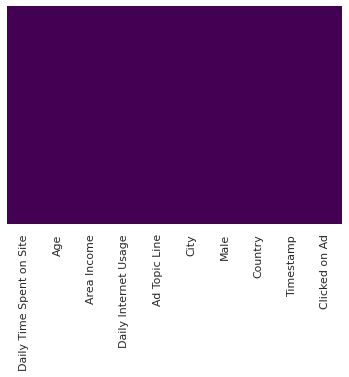

In [9]:
sns.heatmap(advert.isnull(), yticklabels=False,cbar=False,cmap='viridis')

As we can see,no data is missing

Given the state of our dataset, we might need to convert categorical features to dummy variables using Pandas. If we don't, then our ML model will not be able to directly take in those features as inputs!!

# Task 5: Data Visualization

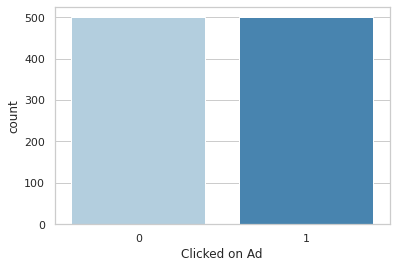

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', data=advert, palette='Blues')

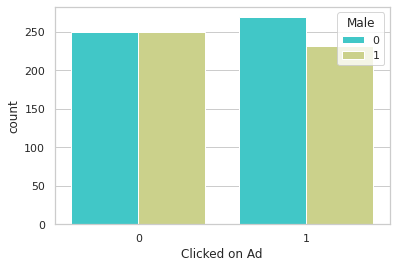

In [11]:
# This shows Click on Ad features based on Sex
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad', data=advert, hue='Male', palette='rainbow')

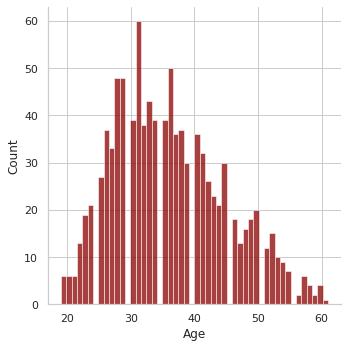

In [12]:
sns.displot(advert['Age'], kde=False, color='darkred', bins=50)

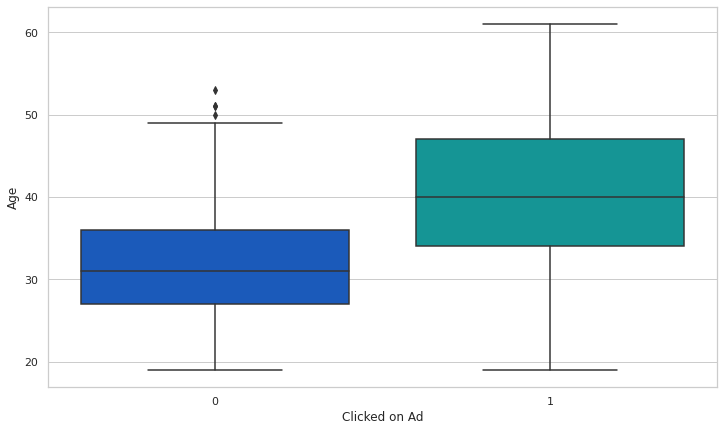

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Clicked on Ad', y='Age', data=advert, palette='winter')

Now we can determine that people in their 40's tend to click more ads than 30 year olds.

# Task 6:Compute the Cost Function

In [ ]:
# This analysis does not require it

# Task 7: Compute the Gradient Decent

In [ ]:
# This analysis does not require it

# Task 8: Perform Train, Test Split 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
Age = advert['Age'].values.reshape(-1, 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Age, advert['Clicked on Ad'], test_size=0.30, random_state=0)

#Task 9: Conduct the Logistic Regression on the Data




# Import the adequate model

In [18]:
from sklearn.linear_model import LogisticRegression

# Create the model by assigning a variable the class pertaining to the model selected

In [19]:
logmodel = LogisticRegression()

#Train the Model created by using the fit method

In [20]:
logmodel.fit(X_train,y_train)

LogisticRegression()

# Evaluate the model

In [21]:
predictions = logmodel.predict(X_test)

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       164
           1       0.74      0.69      0.71       136

    accuracy                           0.75       300
   macro avg       0.75      0.74      0.75       300
weighted avg       0.75      0.75      0.75       300



#Task 10: Making Predictions

In [25]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print('Age: ', sum(pp!=0))
print('Clicked on Ad: ', sum(pp==0))

0.75
Age:  127
Clicked on Ad:  173
